In [4]:
import cv2
import numpy
from matplotlib import pyplot as plt
import math
import map_cover.predict
from map_cover.map import Map
from map_cover.grid import DiscreteProbabilityDistribution

## Load the NN model

In [5]:
model_name = "resource/v7-LandCover-retrained-twice"
model = map_cover.predict.load_model(model_name)

cover_distributions_filename = "resource/cover_distribution.yaml"
cover_distributions = map_cover.predict.load_cover_distributions(cover_distributions_filename)
print(cover_distributions)


{0: DiscreteProbabilityDistribution: {0: 1.0}, 1: DiscreteProbabilityDistribution: {0: 0.9, 1: 0.1}, 2: DiscreteProbabilityDistribution: {0: 0.8, 1: 0.1, 5: 0.1}, 3: DiscreteProbabilityDistribution: {0: 1.0}, 4: DiscreteProbabilityDistribution: {0: 0.7, 1: 0.1, 5: 0.1, 10: 0.1}}


## Load and Show the map

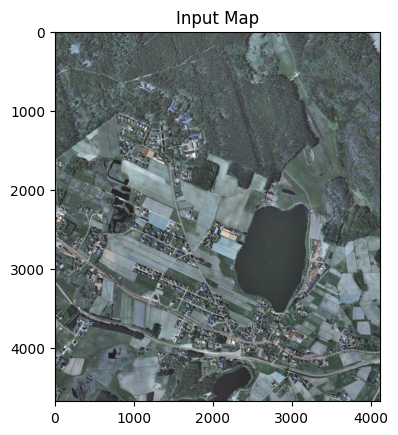

In [6]:

map = Map(0, 100, 0, 100, "kaka_input.tif")

polygons = [
    ((10, 10), (10,20), (40, 10)),
    ((35, 35), (45, 45), (35, 55), (25, 45)),
    ((60,60), (60, 90), (90, 90), (90, 60))
]

polygon_disributions = [
    DiscreteProbabilityDistribution({1: 0.8, 5: 0.2}),
    DiscreteProbabilityDistribution({5: 0.9, 10: 0.1}),
    DiscreteProbabilityDistribution({1: 0.3, 5: 0.2, 10: 0.5}),
]


map_grid_cell_size = (10, 10)

plt.title('Input Map')
plt.imshow(map.image)

## Predict the cover labels


In [7]:
pred = map_cover.predict.image_to_pixel_cover(model, map.image)
map_pred = Map(0, 100, 0, 100, pred)


Splitting files into  /tmp/tmp5hdxbkyj
3/3 [==============================] - 5s 2s/step


## Show the cover labels


* black - Background
* red - building
* green - woodland
* blue - water
* white - road


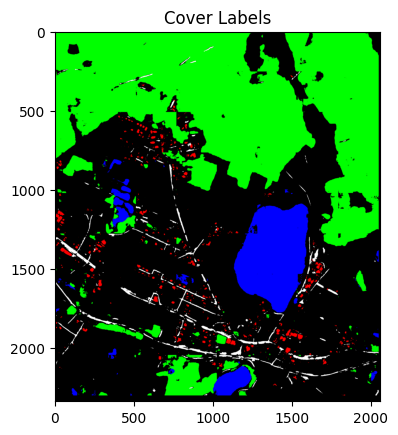

In [8]:
plt.title('Cover Labels')
plt.imshow(map_pred.colormap())


## Add the Polygons to the Cover Labels

Each polygon gets a unique color


{0: DiscreteProbabilityDistribution: {0: 1.0}, 1: DiscreteProbabilityDistribution: {0: 0.9, 1: 0.1}, 2: DiscreteProbabilityDistribution: {0: 0.8, 1: 0.1, 5: 0.1}, 3: DiscreteProbabilityDistribution: {0: 1.0}, 4: DiscreteProbabilityDistribution: {0: 0.7, 1: 0.1, 5: 0.1, 10: 0.1}, 5: DiscreteProbabilityDistribution: {1: 0.8, 5: 0.2}, 6: DiscreteProbabilityDistribution: {5: 0.9, 10: 0.1}, 7: DiscreteProbabilityDistribution: {1: 0.3, 5: 0.2, 10: 0.5}}


Text(0.5, 1.0, 'Map with Polygons')

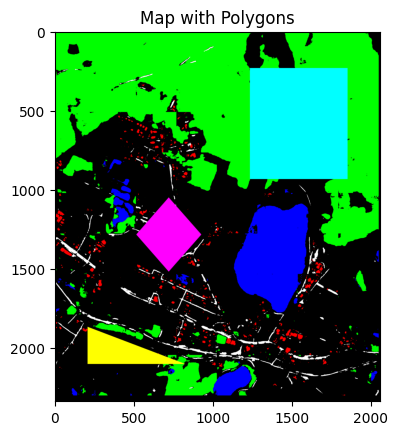

In [9]:
polygon_id = map_cover.predict.NUM_CLASSES

for p, d in zip(polygons, polygon_disributions):     
    map_pred.color_polygon(p, polygon_id)   
    cover_distributions[polygon_id] = d
    polygon_id = polygon_id + 1
    
print(cover_distributions)

plt.imshow(map_pred.colormap())
plt.title('Map with Polygons')    



## Overlay a Grid


In [11]:
grid = map_pred.to_grid(map_grid_cell_size[0], map_grid_cell_size[1], cover_distributions)


for x,y in grid:
    print(x,y, grid[x,y])


0 0 area:POLYGON ((0 0, 0 10, 10 10, 10 0, 0 0))__blocked:False__target:DiscreteProbabilityDistribution: {0: 0.9976599452327607, 1: 0.0011451331839681354, 10: 0.00013069454817027633, 5: 0.0010642270351008216}
0 1 area:POLYGON ((0 10, 0 20, 10 20, 10 10, 0 10))__blocked:False__target:DiscreteProbabilityDistribution: {0: 0.9882042983984732, 1: 0.004875114098415069, 10: 0.0034602937515558875, 5: 0.0034602937515558875}
0 2 area:POLYGON ((0 20, 0 30, 10 30, 10 20, 0 20))__blocked:False__target:DiscreteProbabilityDistribution: {0: 0.966336097337389, 1: 0.014856869036209842, 10: 0.004685611900495854, 5: 0.014121421725905246}
0 3 area:POLYGON ((0 30, 0 40, 10 40, 10 30, 0 30))__blocked:False__target:DiscreteProbabilityDistribution: {0: 0.9784146543855283, 1: 0.009094680939341133, 10: 0.004949796697369513, 5: 0.0075408679777611825}
0 4 area:POLYGON ((0 40, 0 50, 10 50, 10 40, 0 40))__blocked:False__target:DiscreteProbabilityDistribution: {0: 0.9725748900506181, 1: 0.013922081155090865, 10: 0.00